1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [1]:
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/

--2022-12-02 18:39:36--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2022-12-02 18:39:36--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd5a4a82d2c46275093cbda72e8.dl.dropboxusercontent.com/cd/0/inline/Bx0sSAqXjK7i9xpa16g-0xmZv5whNcnaZpV7iYiI3Xfs4AjhvKvswgB524XsHLu7IvzEWZZwjS5X0Bgc9bkANaBD8pftjcDDASw5H3rJ4ncnsYYumpPGTJJmmv63wNO05jCOOXYeOdEgPJfXV-fQoC5hZglsf6diRU5m3qzrutLsfg/file# [following]
--2022-12-02 18:39:37--  https://ucd5a4a82d2c46275093cbda72e8.dl.dropboxusercontent.com/cd/0/inline/Bx0sSAqXjK7i9xpa16g-0xmZv5whNcnaZpV7iYiI3

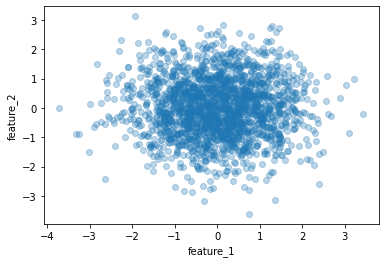

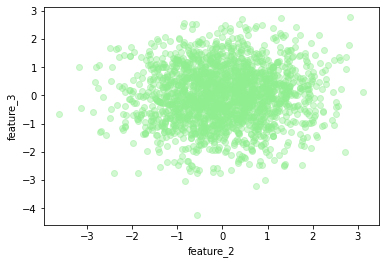

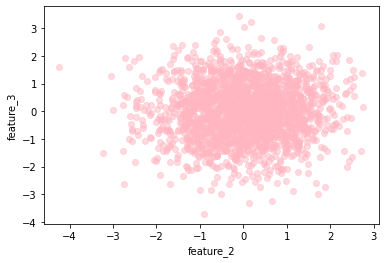

These scatter plots display that these features 1,2,3 are quite similar.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("data/regression_generated.csv")
fig, ax = plt.subplots()
fig,ax1 = plt.subplots()
fig,ax2 = plt.subplots()
ax.scatter(df['features_1'], df['features_2'],alpha=0.3)
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax1.scatter(df['features_2'], df['features_3'],c='lightgreen',alpha=0.4)
ax1.set_xlabel('feature_2')
ax1.set_ylabel('feature_3')
ax2.scatter(df['features_3'], df['features_1'],c='lightpink',alpha=0.5)
ax2.set_xlabel('feature_2')
ax2.set_ylabel('feature_3')
plt.show()
print("These scatter plots display that these features 1,2,3 are quite similar.")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

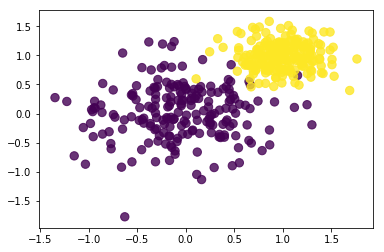

In [18]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

In [ ]:
df_1=df.loc[:, ['features_1']]
df_2=df.loc[:, ['features_2']]
df_3=df.loc[:, ['features_3']]
for col in df_1.columns:
    plt.scatter(df_1[col], df_2[col], label=col)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
